# Mathematical Morphology Operators

Goal of the lecture:
1. Understand & apply the basic morphological operators:
    - Erosion
    - Dilation
    - Opening
    - Closing
1. Apply the operators to _real_ data.


Morphological transformations are simple operations based on the image shape.
They are usually used in digital image processing (e.g, in object recognition, and image segmentation tasks) in order for noise reduction, edge enhancement, and eliminating everything but the object of interest. 

Morphological operators need two inputs: 
1. The original image
2. A structuring element (SE/kernel)

In this lecture we study the basic morphological operators:
- Erosion
- Dilation

With their variants Opening and Closing.

| ![alt text](https://docs.opencv.org/trunk/j.png) | ![alt text](https://docs.opencv.org/trunk/erosion.png) | ![alt text](https://docs.opencv.org/trunk/dilation.png) |
| :---: | :---: | :---: |
| original image | erotion | dilation |

Example images of opening and closing:

|![alt text](https://docs.opencv.org/trunk/opening.png) |![alt text](https://docs.opencv.org/trunk/closing.png) |
| :---: | :---: |
| opening | closing |


*Images taken from [OpenCV](https://opencv.org) docs*

Useful Links:

* http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
* https://en.wikipedia.org/wiki/Erosion_%28morphology%29

In [1]:
# importing libraries and defining _smart_ imshow function
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


def imshow(*args, **kwargs):
    # force cmap to be gray
    kwargs["cmap"] = "gray"
    # Force range to be 8-bit range
    kwargs["vmin"] = 0
    kwargs["vmax"] = 255
    plt.imshow(*args, **kwargs)
    plt.axis("off")

## Erosion

The erosion operator decays the boundaries of the foreground object, by replacing every pixel by the *minimum* value computed over the neighborhood defined by the structuring element (SE). As a result:
* Features that are **darker** than their immediate surroundings are **enlarged** 
* Features that are **brighter** than their immediate surroundings are **shrinked**

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Grayscale_Morphological_Erosion.gif)

**Image from [Greg Insana](https://commons.wikimedia.org/w/index.php?title=User:Greg2020&action=edit&redlink=1) shared via [wikimedia](https://commons.wikimedia.org/wiki/File:Grayscale_Morphological_Erosion.gif).**

### Structuring Element

As we mentioned earlier morphological operators need two inputs, first the original image and the Structuring Element (kernel).
In `SciPy` we define a structuring element by creating an array where non-zero elements define the region of the structuring element.

In [2]:
#Our window function is a 3x3 matrix
kernel_rect = np.ones((3, 3))
kernel_rect

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Example Erosion

In the following we will apply the erosion operation to an example array:

In [7]:
#We create a 15x15 matrix
a = np.zeros((15, 15), dtype=np.uint8)
#Column 3-6 = 120
a[:, 3:6] = 120
a[:, 6:9] = 255
a[:, 9:12] = 120

print(a)

[[  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]]


Before applying the erosion operations, how to you expect the output array to look like?
What will the resulting image look like?

Remember, the kernel is a 3 x 3 fully connected kernel.

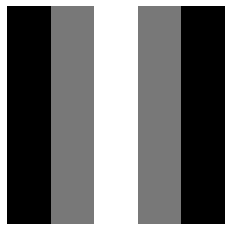

In [8]:
# Before applying erosion
imshow(a)

[[  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]
 [  0   0   0   0 120 120 120 255 120 120 120   0   0   0   0]]


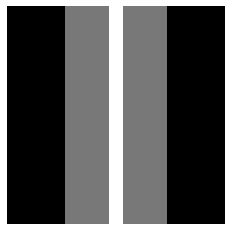

In [9]:
e = ndimage.grey_erosion(a, footprint=kernel_rect) #We use the 3x3 window function we created before
print(e)
imshow(e)

### In-course practice

Create a new 3 x 3 kernel where the corners are _not_ part of the structuring element.

[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255

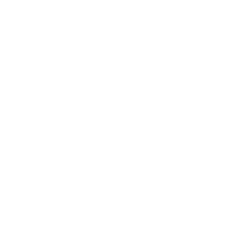

In [20]:
# THis how actual image looks. Our whole image is white
no_corner_inp = np.ones((15, 15)) * 255
print(no_corner_inp) 
imshow(no_corner_inp)

[[  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.   0. 255.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0. 255.   0. 255.   0. 255.   0. 255

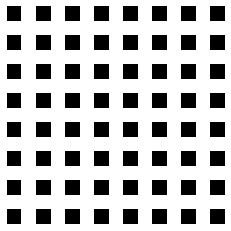

In [21]:
# We make some elements go to zero so we have half white and half black points in an image
no_corner_inp[::2, ::2] = 0
print(no_corner_inp)
imshow(no_corner_inp)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


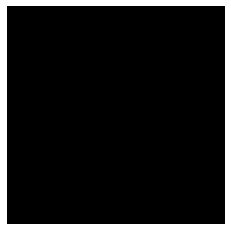

In [22]:
not_part = ndimage.grey_erosion(no_corner_inp, footprint=kernel_rect)
print(not_part)
imshow(not_part)

## Dilation

The dilation operator is the opposite of erosion, increasing the brighter boundries, by replacing every pixel by the *maximum* value computed over the neighborhood defined by the SE. As a result:
* Features that are **brighter** than their immediate surroundings are **enlarged** 
* Features that are **darker** than their immediate surroundings are **shrinked**

### Example Dilation

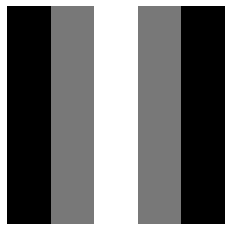

In [23]:
# same array as in first example:
a = np.zeros((15, 15), dtype=np.uint8)
a[:, 3:6] = 120
a[:, 6:9] = 255
a[:, 9:12] = 120
imshow(a)

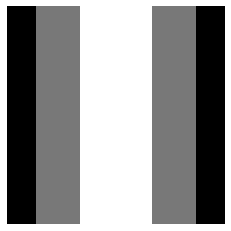

In [24]:
d = ndimage.grey_dilation(a, footprint=kernel_rect)
imshow(d)

### In-course practice

Create an array that produces a white image if the dilation operation is applied with the `rect_kernel`.

Do not create an input array that only contains the value 255!

In [30]:
make_white_inp = np.ones((15,15)) * 255
make_white_inp[::2] = 0
print(make_white_inp)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [  0.   0.   0.   0.   0.   0.   0.   0

[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255.]
 [255. 255. 255. 255. 255. 255. 255. 255

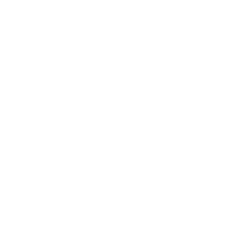

In [31]:
w = ndimage.grey_dilation(make_white_inp, footprint=kernel_rect)
print(w)
imshow(w)

## Opening

Opening is just another name for erosion followed by dilation using the same SE. Generally used to remove small light details and/or noise removal.

* The initial erosion removes the small details, but it also darkens the image
* The dilation again increases the overall image intensity without reintroducing the details removed by the erosion

|![alt text](https://docs.opencv.org/trunk/opening.png) |
| :---: |
| opening |

[[255   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 255 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 255 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0   0]
 [  0   0   0 120 120 120 255 255 255 120 120 120   0   0 255]]


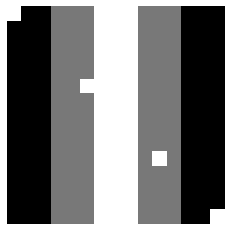

In [33]:
opening_inp = a.copy()
for idx_x, idx_y in [(0, 0), (-1, -1), (5, 5), (-5, -5)]:
    opening_inp[idx_x, idx_y] = 255
print(opening_inp)
imshow(opening_inp)

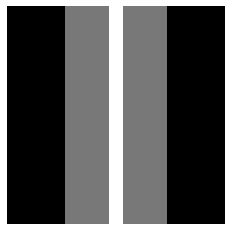

In [34]:
opening_inp_eroded = ndimage.grey_erosion(opening_inp, footprint=kernel_rect)
imshow(opening_inp_eroded)

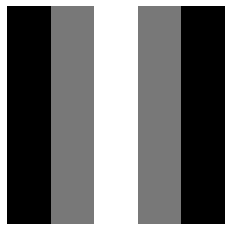

In [35]:
opening_output = ndimage.grey_dilation(opening_inp_eroded, footprint=kernel_rect)
imshow(opening_output)

In [ ]:
# Or directly call the `grey_opening` directly
# imshow(ndimage.grey_opening(opening_inp, footprint=kernel_rect))

## Closing

Closing is just another name for dilation followed by erosion. Generally used to remove dark details, while leaving bright features relatively undisturbed 

* The initial dilation removes the dark details and brightens the image
* The erosion darkens the image without reintroducing the details removed by dilation


|![](https://docs.opencv.org/trunk/closing.png) |
| :---: |
| closing |

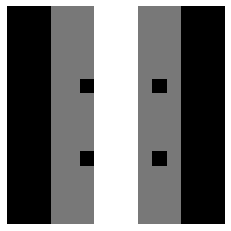

In [36]:
closing_inp = a.copy()
for idx_x, idx_y in [(5, -5), (-5, 5), (5, 5), (-5, -5)]:
    closing_inp[idx_x, idx_y] = 0
imshow(closing_inp)

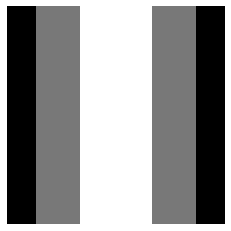

In [37]:
closing_inp_dilated = ndimage.grey_dilation(closing_inp, footprint=kernel_rect)
imshow(closing_inp_dilated)

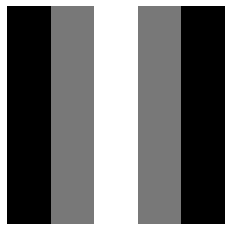

In [38]:
closing_out = ndimage.grey_erosion(closing_inp_dilated, footprint=kernel_rect)
imshow(closing_out)

In [39]:
from simple_downloader import download

# downlaod the sub-image from the previous lecture
# we have stored the bands individually to give them a meaningful name
file_path = download(
    "https://tubcloud.tu-berlin.de/s/i2n2wxEqkPWWYZi/download/sub_rgb_arr.npz", target_dir="data"
)
npzfile = np.load(file_path)
red_arr = npzfile["red"]

Target file already exists!
Will skip download. To force download set `force=True`


In [40]:
# use the code and formulae from previous Lab. So we normalize the image
red_float = (red_arr + 1_000) / 10_000
red_float = np.clip(red_float, 0.0, 1.0)
red_img = np.uint8(red_float * 255)
red_img

array([[66, 63, 63, ..., 64, 67, 72],
       [65, 64, 63, ..., 68, 67, 70],
       [66, 63, 64, ..., 68, 67, 66],
       ...,
       [55, 55, 55, ..., 58, 62, 67],
       [56, 55, 55, ..., 56, 58, 61],
       [55, 55, 55, ..., 57, 57, 62]], dtype=uint8)

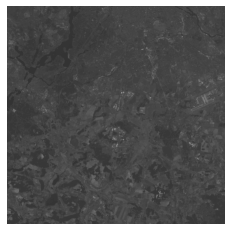

In [41]:
imshow(red_img)

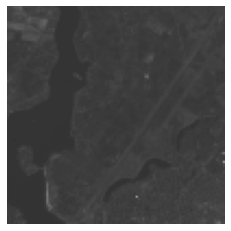

In [42]:
# kernel-size; iterations
# img = red_img[150:350, -200:].copy()
img = red_img[50:150, 150:250]
imshow(img)

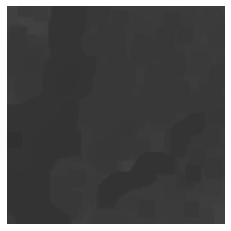

In [43]:
kernel_rect = np.ones((3, 3))

i = img.copy()
for _ in range(3):
    i = ndimage.grey_erosion(i, footprint=kernel_rect)
imshow(i)

## In-course practice

Investigate the effect of changes to the SE shape, size, number of iterations, and morphological operators.